## 获取数据

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import fastbox as fb

In [ ]:
# 随便拿什么数据获取一下，输入账户密码，测试是否登录成功
stockinfo = fb.data.stocks.info()

In [63]:
# time span = 5 day, instrument = 豆一，螺纹钢
df_rb2510 = fb.data.futures.lv1(
        instrumentid = 'RB2510',
        from_date = '2025-03-03',
        to_date = '2025-03-07'
        )
df_rb2510.head()

,last_price,vol,amount,pb,vb,pa,va,open,highest,lowest,oi,avg_price,up_limit,dn_limit,instrumentid
trade_time,,,,,,,,,,,,,,,
2025-03-03 08:59:00.500000+08:00,3375.0,57014.0,1.933010e+09,3375.0,50.0,3376.0,1.0,3400.0,3400.0,3375.0,345073.0,33904.2,3552.0,3213.0,RB2510
2025-03-03 09:00:00.500000+08:00,3380.0,57030.0,1.933550e+09,3378.0,100.0,3379.0,1.0,3400.0,3400.0,3375.0,345070.0,33904.1,3552.0,3213.0,RB2510
2025-03-03 09:00:01+08:00,3378.0,57073.0,1.935010e+09,3378.0,24.0,3380.0,2.0,3400.0,3400.0,3375.0,345083.0,33904.1,3552.0,3213.0,RB2510
2025-03-03 09:00:01.500000+08:00,3378.0,57094.0,1.935720e+09,3378.0,54.0,3379.0,34.0,3400.0,3400.0,3375.0,345094.0,33904.0,3552.0,3213.0,RB2510
2025-03-03 09:00:02+08:00,3378.0,57154.0,1.937740e+09,3377.0,38.0,3378.0,5.0,3400.0,3400.0,3375.0,345083.0,33903.9,3552.0,3213.0,RB2510


In [64]:
df_AG2505 = fb.data.futures.lv1(
        instrumentid = 'AG2505',
        from_date = '2025-03-03',
        to_date = '2025-03-07'
        )
df_AG2505.head()

,last_price,vol,amount,pb,vb,pa,va,open,highest,lowest,oi,avg_price,up_limit,dn_limit,instrumentid
trade_time,,,,,,,,,,,,,,,
2025-03-03 02:30:00.500000+08:00,7843.0,57255.0,6.741350e+09,7841.0,4.0,7844.0,9.0,7850.0,7883.0,7816.0,35262.0,117742.0,8691.0,7110.0,AG2505
2025-03-03 08:59:00.500000+08:00,7875.0,57464.0,6.766030e+09,7874.0,20.0,7875.0,2.0,7850.0,7883.0,7816.0,35323.0,117744.0,8691.0,7110.0,AG2505
2025-03-03 09:00:00.500000+08:00,7876.0,57539.0,6.774900e+09,7876.0,8.0,7879.0,1.0,7850.0,7883.0,7816.0,35377.0,117744.0,8691.0,7110.0,AG2505
2025-03-03 09:00:01+08:00,7885.0,57714.0,6.795590e+09,7885.0,1.0,7886.0,6.0,7850.0,7886.0,7816.0,35447.0,117746.0,8691.0,7110.0,AG2505
2025-03-03 09:00:01.500000+08:00,7885.0,57776.0,6.802920e+09,7885.0,30.0,7888.0,74.0,7850.0,7888.0,7816.0,35420.0,117746.0,8691.0,7110.0,AG2505


In [3]:
# 尝试使用 openpyxl 引擎读取文件
try:
    df = pd.read_excel('future prediction.xlsx', engine='openpyxl')
    print("文件成功读取！")
    print(df.head())
except Exception as e:
    print(f"使用 openpyxl 读取失败：{e}")

# 如果文件为 .xls 格式，尝试使用 xlrd 引擎
try:
    df = pd.read_excel('future prediction.xls', engine='xlrd')
    print("文件成功读取！")
    print(df.head())
except Exception as e:
    print(f"使用 xlrd 读取失败：{e}")

# 如果文件为 CSV 格式，尝试使用 pd.read_csv()
try:
    df = pd.read_csv('future prediction.xlsx')
    print("文件成功读取！")
    #print(df.head())
except Exception as e:
    print(f"使用 pd.read_csv() 读取失败：{e}")

使用 openpyxl 读取失败：File is not a zip file
使用 xlrd 读取失败：[Errno 2] No such file or directory: 'future prediction.xls'
文件成功读取！


## 合并清洗与预处理

In [4]:
df_rb2510 = df.loc[df['instrumentid']=='RB2510']
df_rb2510.isna().sum()

last_price                     0
vol                            0
amount                         0
pb                             0
vb                             0
pa                             0
va                             0
open                           0
highest                        0
lowest                         0
oi                             0
avg_price                      0
up_limit                       0
dn_limit                       0
instrumentid                   0
return_1s                      0
return_3s                      0
return_5s                      0
return_10s                     0
log_return                     0
lastprice_ma_5snap             0
logreturn_volatility_5snap     0
lastprice_ma_10snap            0
logreturn_volatility_10snap    0
lastprice_ma_20snap            0
logreturn_volatility_20snap    0
bid_ask_spread                 0
volume_ma_10s                  0
price_volume_corr              0
depth_imbalance                0
volume_cha

In [5]:
df_AG2505 = df.loc[df['instrumentid']=='AG2505']
del df
df_AG2505.isna().sum()

last_price                     0
vol                            0
amount                         0
pb                             0
vb                             0
pa                             0
va                             0
open                           0
highest                        0
lowest                         0
oi                             0
avg_price                      0
up_limit                       0
dn_limit                       0
instrumentid                   0
return_1s                      0
return_3s                      0
return_5s                      0
return_10s                     0
log_return                     0
lastprice_ma_5snap             0
logreturn_volatility_5snap     0
lastprice_ma_10snap            0
logreturn_volatility_10snap    0
lastprice_ma_20snap            0
logreturn_volatility_20snap    0
bid_ask_spread                 0
volume_ma_10s                  0
price_volume_corr              0
depth_imbalance                0
volume_cha

说明原始数据并无缺失值

### 查看分布，处理异常值

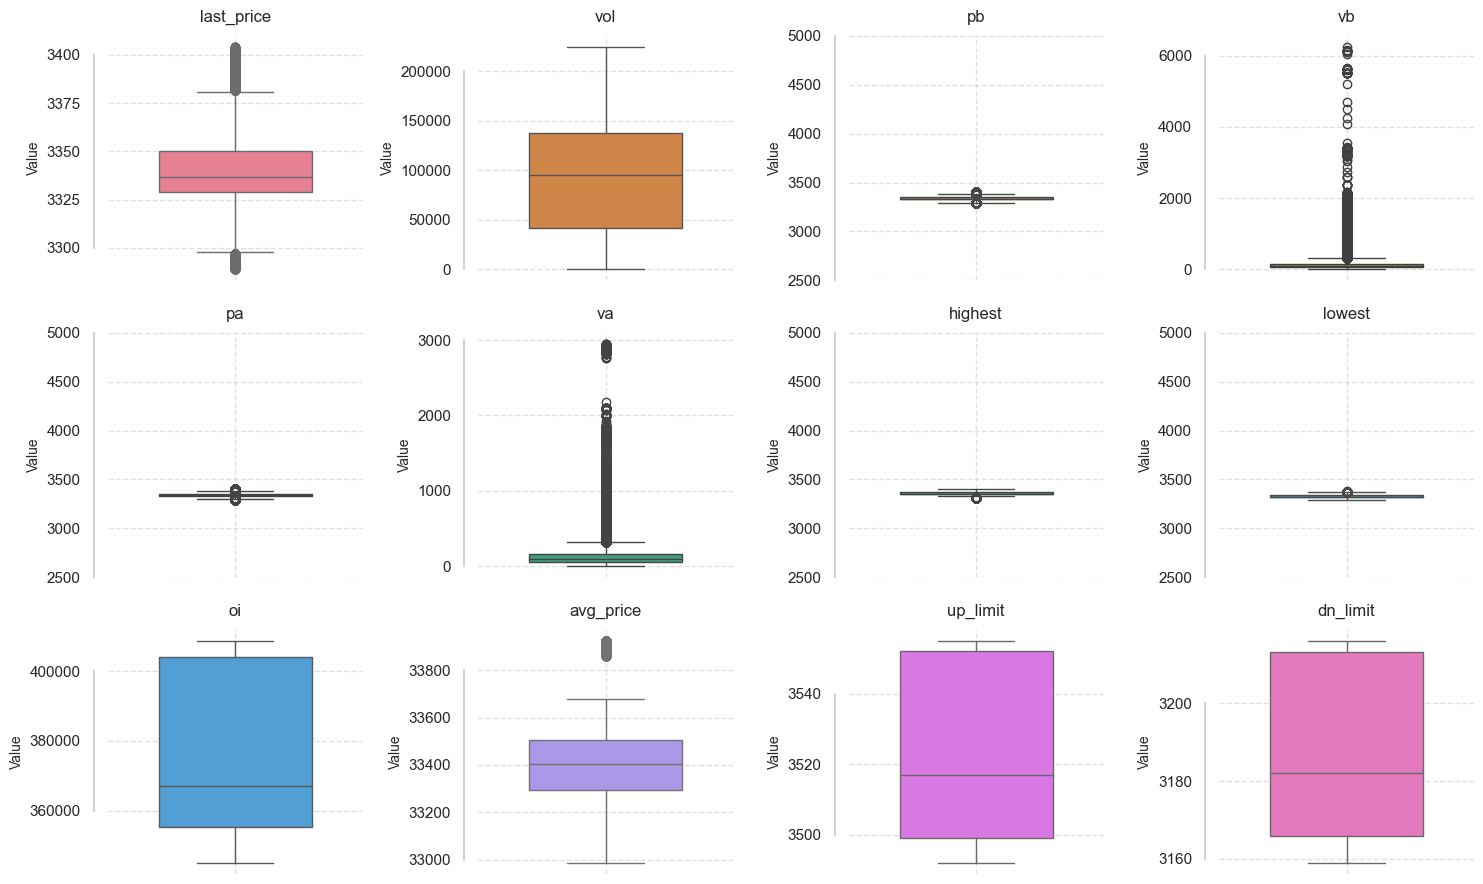

In [6]:
# 箱线图
df_rb2510_new = df_rb2510[df_rb2510.columns[:14]]
df_rb2510_new = df_rb2510_new.drop(['amount','open'], axis=1)

sns.set(style="whitegrid", palette="pastel")
num_cols = len(df_rb2510_new.columns)
ncols = 4
nrows = (num_cols + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))
axes = axes.flatten()

y_limits = {
    'pb': (2500, 5000),
    'pa': (2500, 5000),
    'highest': (2500, 5000),
    'lowest':(2500, 5000)
}

# 颜色列表
palette = sns.color_palette("husl", len(df_rb2510_new.columns))
for i, col in enumerate(df_rb2510_new.columns):
    if i >= len(axes):
        break
        
    sns.boxplot(y=df_rb2510_new[col], ax=axes[i], color=palette[i], width=0.6)
    
    # 设置标题和标签
    axes[i].set_title(col, fontsize=12, pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=10)
    
    # 如果该列在y_limits字典中，则设置Y轴范围
    if col in y_limits:
        axes[i].set_ylim(y_limits[col])
    
    # 美化图形
    axes[i].grid(True, linestyle='--', alpha=0.6)
    sns.despine(ax=axes[i], offset=10, trim=True)

# 隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('螺纹钢2510箱线图.png')
plt.show()

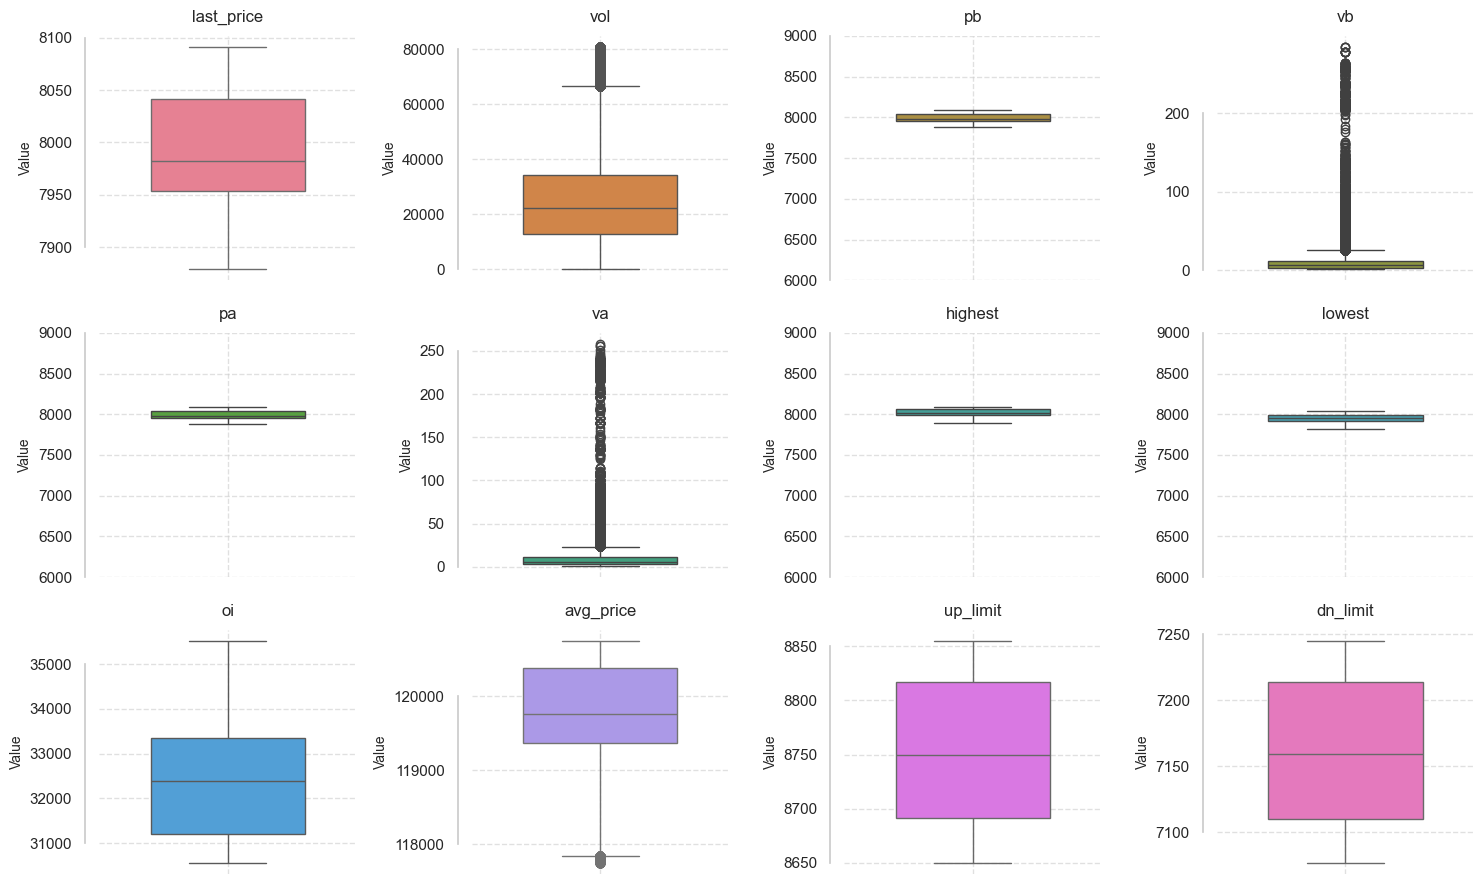

In [7]:
df_AG2505_new = df_AG2505[df_rb2510.columns[:14]]
df_AG2505_new = df_AG2505_new.drop(['amount','open'], axis=1)

sns.set(style="whitegrid", palette="pastel")
num_cols = len(df_AG2505_new.columns)
ncols = 4
nrows = (num_cols + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))
axes = axes.flatten()

y_limits = {
    'pb': (6000, 9000),
    'pa': (6000, 9000),
    'highest': (6000, 9000),
    'lowest':(6000, 9000)
}

# 颜色列表
palette = sns.color_palette("husl", len(df_AG2505_new.columns))
for i, col in enumerate(df_AG2505_new.columns):
    if i >= len(axes):
        break
        
    sns.boxplot(y=df_AG2505_new[col], ax=axes[i], color=palette[i], width=0.6)
    
    # 设置标题和标签
    axes[i].set_title(col, fontsize=12, pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=10)
    
    # 如果该列在y_limits字典中，则设置Y轴范围
    if col in y_limits:
        axes[i].set_ylim(y_limits[col])
    
    # 美化图形
    axes[i].grid(True, linestyle='--', alpha=0.6)
    sns.despine(ax=axes[i], offset=10, trim=True)

# 隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('沪银2505箱线图.png')
plt.show()

## 特征工程

### 特征构建

In [8]:
# 合并两个df
df = pd.concat([df_rb2510, df_AG2505], axis=0).sort_index()

horizons_seconds = [1, 3, 5, 10]  # 1秒/3秒/5秒/10秒
# 转换为对应的snapshot数量（0.5秒一个点）
horizons_snapshots = [int(h * 2) for h in horizons_seconds]  # [2, 6, 10, 20]

# 按照 instrumentid 分组，分别计算未来收益率
def calculate_returns(group):
    for h_snap, h_sec in zip(horizons_snapshots, horizons_seconds):
        group[f'return_{h_sec}s'] = (group['last_price'].shift(-h_snap) - group['last_price']) / group['last_price']
    return group

# 使用 groupby 和 apply 对每个 instrumentid 分组计算收益率
df = df.groupby('instrumentid', group_keys=False).apply(calculate_returns)

# 删除无法计算未来收益率的行
df = df.dropna()

C:\Users\25038\AppData\Local\Temp\ipykernel_13912\3644214095.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('instrumentid', group_keys=False).apply(calculate_returns)


In [9]:
# 定义一个函数来计算对数收益率
def calculate_log_return(group):
    group['log_return'] = np.log(group['last_price'] / group['last_price'].shift(1))
    return group

# 滚动窗口特征（窗口大小按snapshot数量计算）
window_snapshots = [5, 10, 20]  # 对应2.5秒/5秒/10秒

# 定义一个函数来计算滚动窗口特征
def calculate_rolling_features(group):
    for w in window_snapshots:
        group[f'lastprice_ma_{w}snap'] = group['last_price'].rolling(w).mean()  # 最新成交价移动平均
        group[f'logreturn_volatility_{w}snap'] = group['log_return'].rolling(w).std()  # 波动率
    return group

# 使用 groupby 和 apply 对每个 instrumentid 分组计算滚动窗口特征
df = df.groupby('instrumentid', group_keys=False).apply(calculate_rolling_features)

# 买卖价差
df['bid_ask_spread'] = df['pa'] - df['pb']

C:\Users\25038\AppData\Local\Temp\ipykernel_13912\3337851869.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('instrumentid', group_keys=False).apply(calculate_rolling_features)


In [10]:
# 定义一个函数来计算量价特征
def calculate_volume_features(group):
    # 5秒成交量移动平均
    group['volume_ma_10s'] = group['vol'].rolling(10).mean()
    
    # 30秒量价相关性
    group['price_volume_corr'] = group['last_price'].rolling(30).corr(group['vol'])
    
    # 买卖盘深度不对称性
    group['depth_imbalance'] = (group['vb'] - group['va']) / (group['vb'] + group['va'])
    
    # 成交量变化率：瞬时变化率
    group['volume_change_rate'] = group['vol'].pct_change()
    
    # 成交量变化率：滚动窗口变化率（例如5秒窗口=10个snapshot）
    window_snapshots = 10
    group['volume_change_rate_5s'] = group['vol'].pct_change(periods=window_snapshots)
    
    # EMA指数移动平均变化率
    ema_window = 5  # 2.5秒的EMA平滑
    group['volume_ema'] = group['vol'].ewm(span=ema_window, adjust=False).mean()
    group['volume_ema_change_rate'] = group['volume_ema'].pct_change()
    
    return group

# 使用 groupby 和 apply 对每个 instrumentid 分组计算量价特征
df = df.groupby('instrumentid', group_keys=False).apply(calculate_volume_features)

C:\Users\25038\AppData\Local\Temp\ipykernel_13912\3955025747.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('instrumentid', group_keys=False).apply(calculate_volume_features)


In [11]:
# 定义一个函数来计算动态特征
def calculate_dynamic_features(group):
    # 高低价波动率
    group['high_low_range'] = (group['highest'] - group['lowest']) / group['open']
    
    # 成交量波动率（5个snapshot窗口）
    group['vol_std_5'] = group['vol'].rolling(5).std()
    
    return group

# 使用 groupby 和 apply 对每个 instrumentid 分组计算动态特征
df = df.groupby('instrumentid', group_keys=False).apply(calculate_dynamic_features)

C:\Users\25038\AppData\Local\Temp\ipykernel_13912\3475889366.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('instrumentid', group_keys=False).apply(calculate_dynamic_features)


In [12]:
# 定义一个函数来计算 MACD
def calculate_macd(close_prices, short=12, long=26, signal=9):
    # 计算EMA
    ema_short = close_prices.ewm(span=short, adjust=False).mean()
    ema_long = close_prices.ewm(span=long, adjust=False).mean()
    
    # 计算DIF和DEA
    dif = ema_short - ema_long
    dea = dif.ewm(span=signal, adjust=False).mean()
    macd_hist = dif - dea
    
    return dif,dea,macd_hist

# 定义一个函数，在每个 instrumentid 分组中计算 MACD
def calculate_macd_per_group(group):
    dif,dea,macd_hist= calculate_macd(group['last_price'])
    group['DIF']=dif
    group['DEA']=dea
    group['MACD_hist']=macd_hist
    return group

# 使用 groupby 和 apply 对每个 instrumentid 分组计算 MACD
df = df.groupby('instrumentid', group_keys=False).apply(calculate_macd_per_group)

C:\Users\25038\AppData\Local\Temp\ipykernel_13912\1620759488.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('instrumentid', group_keys=False).apply(calculate_macd_per_group)


In [13]:
# 替换无穷大为NaN，然后删除
df = df.replace([np.inf, -np.inf], np.nan).dropna()
print(df.shape)   #最后剩下这么多

(355604, 39)


### 特征选取

In [14]:
# 划分训练集与测试集，测试变量重要性
# 特征选择（X）和目标变量（y）
features = [
    'log_return', 'lastprice_ma_5snap', 'logreturn_volatility_5snap', 
    'lastprice_ma_10snap', 'logreturn_volatility_10snap', 
    'lastprice_ma_20snap', 'logreturn_volatility_20snap', 'bid_ask_spread',
    'volume_ma_10s','price_volume_corr','depth_imbalance','volume_change_rate',
    'volume_change_rate_5s','volume_ema','volume_ema_change_rate','high_low_range',
    'vol_std_5','MACD_hist'
]

df_rb = df[df['instrumentid']=='RB2510'].reset_index()
df_rb=df_rb.loc[df_rb['return_1s'] != 0 ]

horizons = [1, 3, 5, 10]
X = df_rb[features]
y = df_rb[[f'return_{h}s' for h in horizons]]  # 多目标预测

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集（按时间顺序）
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

In [15]:
# 岭回归
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # alpha为正则化强度
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso回归
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)  # 可产生稀疏解
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# # 随机森林
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# y_pred_rfg = model.predict(X_test)

return_1s: MSE=0.000000, R2=0.2035
return_3s: MSE=0.000000, R2=0.1585
return_5s: MSE=0.000000, R2=0.1374
return_10s: MSE=0.000000, R2=0.1084


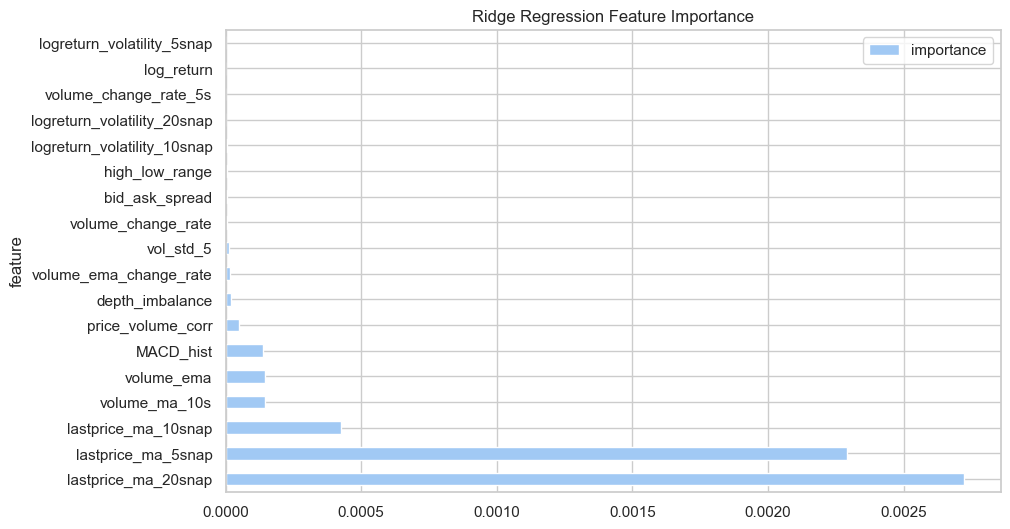

In [16]:
# 计算各时间窗口的MSE和R2
results = {}
for i, h in enumerate(horizons):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_ridge[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred_ridge[:, i])
    results[f'return_{h}s'] = {'MSE': mse, 'R2': r2}

# 输出结果
for k, v in results.items():
    print(f"{k}: MSE={v['MSE']:.6f}, R2={v['R2']:.4f}")

# 获取特征重要性（多输出场景）
feature_importance = np.mean(np.abs(ridge_model.coef_), axis=0)

# 结果展示
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# 可视化
importance_df.plot.barh(x='feature', y='importance', figsize=(10, 6))
plt.title("Ridge Regression Feature Importance")
plt.show()

In [17]:
##############准确性：剔除没有发生价格跳变的情况################


# # 过滤掉 y_test 中 return_1s 列为 0 的样本
# non_zero_mask = y_test['return_1s'] != 0  # 创建布尔掩码
# y_test_filtered = y_test[non_zero_mask]   # 过滤 y_test
# y_pred_filtered = y_pred_ridge[non_zero_mask]  # 过滤 y_pred_ridge

# 计算方向准确率（排除 return_1s 为 0 的样本）
sign_accuracy = np.mean(
    np.sign(y_pred_ridge) == np.sign(y_test.values), axis=0
)

# 输出结果
for h, acc in zip(horizons, sign_accuracy):
    print(f"Return_{h}s方向准确率: {acc:.2%}")

Return_1s方向准确率: 70.84%
Return_3s方向准确率: 50.94%
Return_5s方向准确率: 46.37%
Return_10s方向准确率: 45.10%


In [18]:
# 检查预测方向准确性
sign_accuracy = np.mean(
    np.sign(y_pred_ridge) == np.sign(y_test.values), axis=0
)
for h, acc in zip(horizons, sign_accuracy):
    print(f"Return_{h}s方向准确率: {acc:.2%}")

Return_1s方向准确率: 70.84%
Return_3s方向准确率: 50.94%
Return_5s方向准确率: 46.37%
Return_10s方向准确率: 45.10%


In [ ]:
# 计算各时间窗口的MSE和R2
results = {}
for i, h in enumerate(horizons):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_lasso[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred_lasso[:, i])
    results[f'return_{h}s'] = {'MSE': mse, 'R2': r2}

# 输出结果
for k, v in results.items():
    print(f"{k}: MSE={v['MSE']:.6f}, R2={v['R2']:.4f}")

# 获取特征重要性（多输出场景）
feature_importance = np.mean(np.abs(lasso_model.coef_), axis=0)

# 结果展示
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# 可视化
importance_df.plot.barh(x='feature', y='importance', figsize=(10, 6))
plt.title("Lasso Regression Feature Importance")
plt.show()

一般L1正则化倾向产生稀疏解，用于特征选择，因此主要参考lasso

In [ ]:
# 检查预测方向准确性
sign_accuracy = np.mean(
    np.sign(y_pred_lasso) == np.sign(y_test.values), axis=0
)
for h, acc in zip(horizons, sign_accuracy):
    print(f"Return_{h}s方向准确率: {acc:.2%}")

In [21]:
# 重新选择特征
features = [
    'log_return', 'logreturn_volatility_5snap', 
    'lastprice_ma_10snap', 
    'lastprice_ma_20snap', 'bid_ask_spread',
    'volume_ma_10s','volume_change_rate',
    'volume_ema_change_rate','high_low_range',
    'MACD_hist'
]

# 再次进行lasso/ridge回归看效果有无提升，你可以多试试不同的特征选择。因为我跑的时候随机森林很慢，所以可能是要筛选一些特征，也可能是参数设置的问题
# 或者得分不高有可能是因为我选了两种期货，可以通过df_rb = df[df['instrumentid']=='RB2510'] 筛选只看一种期货，可能预测效果和速度都会变好
# 或者也可以考虑把对1秒，3秒，5秒，10秒return的值分开每个单独看mse和r2，选相对预测效果好的放在结果里。他的Prediction Horizon是define one or multiple horizons,我把那几个时间区间都测了一下
# 最后可以看下eda阶段可以画一些变量之间的热图/分布图

### 回测框架
    - 该框架没有考虑保证金机制（其实最好有）
    - 该框架没有考虑流动性问题（由于对手方数据较难获取，所以一般也只有付费量化回测框架有）
    - 该框架考虑了滑点、手续费、做空利率、可以基于index得来的tick_flow(bar)进一步开发买卖策略

日化夏普比率为 -0.000000365


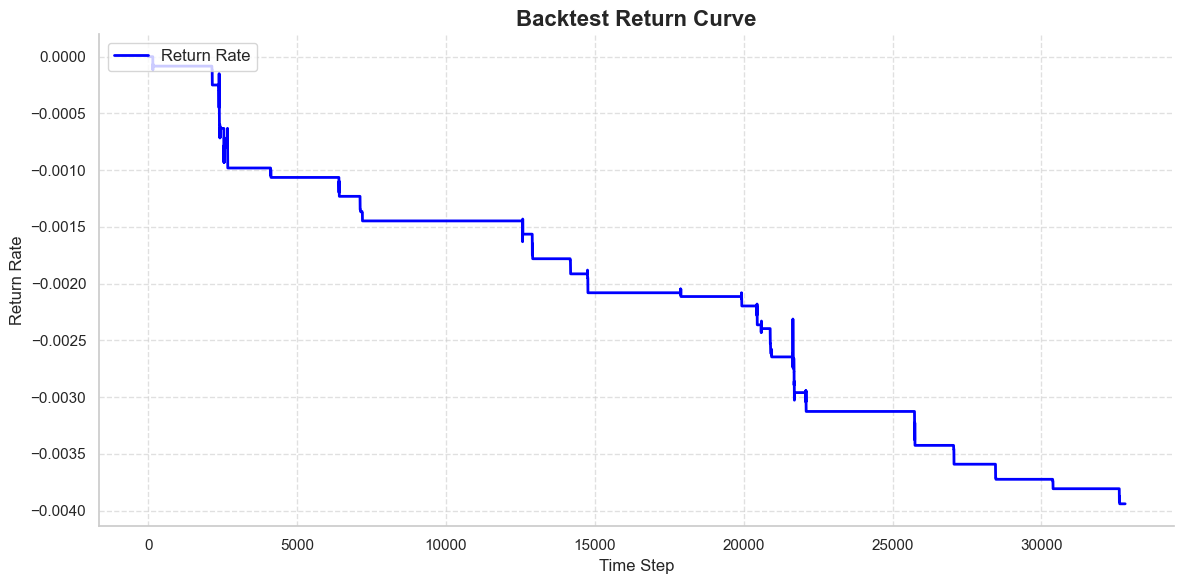

In [39]:
class BacktestFramework:
    def __init__(self, commission=0.0001, slipper=1, hand_num=5, borrow_rate=0.0001):
        self.total_asset = None  # 初始资金
        self.available_asset = None  # 可用资金
        self.short_pos = 0  # 卖空仓位
        self.long_pos = 0  # 买多仓位
        self.commission = commission  # 手续费
        self.slipper = slipper  # 滑点
        self.hand_num = hand_num  # 每次操作手数
        self.back_data_set = None  # 回测数据集
        self.borrow_rate = borrow_rate  # 借入利率（每日）
        self.log = []  # 日志
        self.return_list = []  # 收益率结果
        self.tick_flow = None  # 时间流
        self.long_record=[]    #交易时间点记录
        self.short_record=[]
        self.close_record = []

    def set_back_data(self, data, asset_set):  # 设置回测数据集（必要！）
        self.back_data_set = data
        self.tick_flow = data.index
        self.total_asset = asset_set
        self.available_asset = asset_set  # 初始化可用资金

    def long_in(self, sign_index):
        if self.back_data_set is None:
            raise ValueError("Backtest data has not been set.")
        long_price = self.back_data_set.loc[sign_index + self.slipper, 'pa']  # pa 买入价格
        long_quant = 100 * self.hand_num * long_price  # 计算买入数量
        if self.available_asset * 0.95 < long_quant + long_quant * self.commission:
            return None  # 资金不足，无法买入
        else:
            self.long_pos += 100 * self.hand_num  # 更新买多仓位
            self.available_asset -= long_quant + long_quant * self.commission  # 扣除资金和手续费
            self.log.append(f'在{sign_index + self.slipper}时点买入 {long_quant}')
            return True  # 成功买入

    def short_in(self, sign_index):
        if self.back_data_set is None:
            raise ValueError("Backtest data has not been set.")
        short_price = self.back_data_set.loc[sign_index + self.slipper, 'pb']  # 卖空价格
        short_quant = 100 * self.hand_num * short_price  # 计算卖空数量
        self.short_pos += 100 * self.hand_num  # 更新卖空仓位
        self.available_asset += short_quant - short_quant * self.commission  # 增加资金并扣除手续费
        borrow_cost = self.short_pos * self.borrow_rate  # 借入利息
        self.available_asset -= borrow_cost
        self.log.append(f'在{sign_index + self.slipper}时点卖空 {short_quant}')
        return True  # 成功卖空

    def long_close(self, sign_index):  # 多头平仓
        if self.long_pos <= 0:
            return None  # 没有多头仓位，无法平仓
        long_close_price = self.back_data_set.loc[sign_index + self.slipper, 'pb']  # pb 卖出价格
        short_quant = long_close_price * 100 * self.hand_num
        self.long_pos -= 100 * self.hand_num  # 减去多头仓位
        self.available_asset += short_quant - short_quant * self.commission
        self.log.append(f'在{sign_index + self.slipper}时点卖出多头平仓 {short_quant}')
        return True

    def short_close(self, sign_index):  # 空头平仓
        if self.short_pos <= 0:
            return None  # 没有空头仓位，无法平仓
        short_close_price = self.back_data_set.loc[sign_index + self.slipper, 'pa']  # pa 买回价格
        short_quant = short_close_price * 100 * self.hand_num
        self.short_pos -= 100 * self.hand_num
        self.available_asset -= short_quant + short_quant * self.commission
        self.log.append(f'在{sign_index + self.slipper}时点买入空头平仓 {short_quant}')
        return True

    def calculate_total_asset(self, tick):  # 资产总值变化
        price_cal = self.back_data_set.loc[tick, 'pa']  # 使用当前价格计算资产总值
        self.total_asset = self.available_asset + self.long_pos * price_cal - self.short_pos * price_cal
        self.return_list.append(self.total_asset)  # 存储总资产值
        return self.total_asset

    def strategy(self, hand_num, reference, tick):
        self.hand_num = hand_num  # 自定义一次买卖手数   增加减少表示购买的激进程度
        signal_buy = 0.000301
        signal_sell = -0.000301
        fluent = 5
        column_name = f'return_{fluent}s'
        length_close = fluent * 2

        if tick - length_close in self.long_record:  # 如果前 5s 内有预测收益小于阈值，则卖出平仓
            self.long_close(tick)
            self.close_record.append(tick+self.slipper)
        if tick - length_close in self.short_record:  # 如果前 5s 内有预测收益大于阈值，则买入平仓
            self.short_close(tick)
            self.close_record.append(tick+self.slipper)
            

        # 检查 tick 是否在索引范围内
        if tick not in reference.index:
            return None
        else:
            if reference.loc[tick, column_name] >= signal_buy:  # 如果 5s 内预测收益大于阈值，买入
                self.long_in(tick)
                self.long_record.append(tick+self.slipper)
            if reference.loc[tick, column_name] <= signal_sell:  # 如果 5s 内预测收益小于阈值，卖出
                self.short_in(tick)
                self.short_record.append(tick+self.slipper)


    def run(self, hand_num, reference):
        if self.back_data_set is None or self.total_asset is None:
            raise Exception("back_data_set or total asset is None")
        for tick in self.tick_flow:
            self.strategy(hand_num, reference, tick)
            self.calculate_total_asset(tick)


# 创建回测实例
back_test = BacktestFramework()
back_test.set_back_data(df[df['instrumentid']=='RB2510'].reset_index().iloc[125018::],
                         10000000)
y_pred_ridge = pd.DataFrame(y_pred_ridge,columns=y_test.columns,index=y_test.index)
back_test.run(hand_num=5, reference=y_pred_ridge)


return_raw = (back_test.return_list[-1] - back_test.return_list[0])/back_test.return_list[0]
excess_return = return_raw - (1+0.016)**(1/251) +1     # 0.016为shibor 无风险收益率

sharpe_ratio  = excess_return/np.std(back_test.return_list)
print(f"日化夏普比率为 {sharpe_ratio:.9f}")


# 设置 Seaborn 风格
sns.set(style="whitegrid")  # 使用白色网格背景
plt.figure(figsize=(12, 6))  # 设置画布大小

# 绘制收益率曲线
return_df = pd.DataFrame(back_test.return_list, columns=["Total Asset"])  # 将收益率列表转换为 DataFrame
return_df["Return Rate"] = (return_df["Total Asset"] - return_df["Total Asset"].iloc[0]) / return_df["Total Asset"].iloc[0]  # 计算收益率

# 绘制收益率曲线
plt.plot(return_df.index, return_df["Return Rate"], color="blue", linewidth=2, label="Return Rate")

# 添加标题和标签
plt.title("Backtest Return Curve", fontsize=16, fontweight="bold")  # 设置标题
plt.xlabel("Time Step", fontsize=12)  # x 轴标签
plt.ylabel("Return Rate", fontsize=12)  # y 轴标签

# 添加网格线
plt.grid(True, linestyle="--", alpha=0.6)

# 添加图例
plt.legend(loc="upper left", fontsize=12)

# 美化坐标轴
plt.gca().spines["top"].set_visible(False)  # 隐藏顶部边框
plt.gca().spines["right"].set_visible(False)  # 隐藏右侧边框

# 显示图表
plt.tight_layout()  # 自动调整布局
plt.show()   

-9.187580115399552e-05